In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def plot_prism(ax, origin, width, length, height, color='cyan', alpha=1):
    # Define the vertices of the prism
    x = [origin[0], origin[0] + width, origin[0] + width, origin[0], origin[0], origin[0] + width, origin[0] + width, origin[0]]
    y = [origin[1], origin[1], origin[1] + length, origin[1] + length, origin[1], origin[1], origin[1] + length, origin[1] + length]
    z = [origin[2], origin[2], origin[2], origin[2], origin[2] + height, origin[2] + height, origin[2] + height, origin[2] + height]

    # Combine the vertices into faces
    vertices = [
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[5], y[5], z[5]), (x[4], y[4], z[4])],  # Bottom face
        [(x[3], y[3], z[3]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Top face
        [(x[0], y[0], z[0]), (x[3], y[3], z[3]), (x[7], y[7], z[7]), (x[4], y[4], z[4])],  # Front face
        [(x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[5], y[5], z[5])],  # Back face
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[3], y[3], z[3])],  # Left face
        [(x[4], y[4], z[4]), (x[5], y[5], z[5]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Right face
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(vertices, facecolors=color, alpha=alpha)

    # Add the collection to the plot
    ax.add_collection3d(poly3d)

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot first prism
plot_prism(ax, origin=[-1, -1, 0], width=2, length=2, height=3)

# Plot second prism
plot_prism(ax, origin=[1, 1, 1], width=4, length=2, height=1)

# Set labels and title
ax.set_xlabel('Width/Length (km)')
ax.set_ylabel('Extension (km)')
ax.set_zlabel('Height (km)')
ax.set_title('Merged Prisms')

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 3])

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def plot_prism(ax, origin, width, length, height, color='cyan', alpha=1, edge_color ='black'):
    # Define the vertices of the prism
    x = [origin[0], origin[0] + width, origin[0] + width, origin[0], origin[0], origin[0] + width, origin[0] + width, origin[0]]
    y = [origin[1], origin[1], origin[1] + length, origin[1] + length, origin[1], origin[1], origin[1] + length, origin[1] + length]
    z = [origin[2], origin[2], origin[2], origin[2], origin[2] + height, origin[2] + height, origin[2] + height, origin[2] + height]

    # Combine the vertices into faces
    vertices = [
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[5], y[5], z[5]), (x[4], y[4], z[4])],  # Bottom face
        [(x[3], y[3], z[3]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Top face
        [(x[0], y[0], z[0]), (x[3], y[3], z[3]), (x[7], y[7], z[7]), (x[4], y[4], z[4])],  # Front face
        [(x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[5], y[5], z[5])],  # Back face
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[3], y[3], z[3])],  # Left face
        [(x[4], y[4], z[4]), (x[5], y[5], z[5]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Right face
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(vertices, facecolors=color,edgecolors=edge_color, alpha=alpha)

    # Add the collection to the plot
    ax.add_collection3d(poly3d)


def add_top_plane(ax, xlim, ylim, z_height, color='gray', alpha=0.5):
    # Create a meshgrid for the plane
    x = np.linspace(xlim[0], xlim[1], 10)
    y = np.linspace(ylim[0], ylim[1], 10)
    X, Y = np.meshgrid(x, y)
    Z = np.full(X.shape, z_height)  # Set Z to the desired height for the plane

    # Plot the surface
    ax.plot_surface(X, Y, Z, color=color, alpha=alpha)    

# Create a new figure
fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot( projection='3d')


# Set the prism dimensions
width = 2.0  # Width in km
length = 2.5  # Length in km
depth_start = 0.55  # Depth in km (550 m)
depth_end = 2.5  # Depth in km (2500 m)

# Plot a vertical prism with the specified dimensions
plot_prism(ax, origin=[0.5, 0.2, depth_start], width=width, length=length, height=(depth_end - depth_start), color='blue', alpha=0.7, edge_color='black')

# Set labels and title
ax.set_xlabel('Y (km)')
ax.set_ylabel('X (km)')
ax.set_zlabel('Depth (km)')
#ax.set_title('Single Vertical Prism')

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([2.5, 0])

#ax.tick_params(axis='both', labelsize=12, colors='black')

# Create the extra Z-axis
extra_z_position = 5.2  # Position for the extra Z-axis
ax.plot([-5.5, -5.5], [extra_z_position, extra_z_position], [2.6, 0], color='black')  # Extra Z-axis line


#plt.subplots_adjust(left=4, right=9, top=0.9, bottom=0.1)  # Increase whitespace around the plot

# Create a black border around the axes
# Add the top plane at the desired height
add_top_plane(ax, xlim=(-5.5, 5.5), ylim=(-5.5, 5.5), z_height=0, color='lightgray', alpha=0.7)


# Adjust the viewing angle
ax.view_init(elev=15, azim=23)  # Adjust these values for better visualization

plt.subplots_adjust(left=0.4, right=9, top=1, bottom=0.1)  # Increase whitespace around the plot
plt.tight_layout()
#plt.show()

# # Rotate the plot (this can be adjusted based on your preference)
# for angle in range(0, 360, 2):  # Rotate from 0 to 360 degrees
#     ax.view_init(elev=30, azim=10)
#     plt.draw()
#     plt.pause(0.05)  # Pause to create the animation effect


plt.show()    


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def plot_prism(ax, origin, width, length, height, color='cyan', alpha=1, edge_color='black'):
    # Define the vertices of the prism
    x = [origin[0], origin[0] + width, origin[0] + width, origin[0], origin[0], origin[0] + width, origin[0] + width, origin[0]]
    y = [origin[1], origin[1], origin[1] + length, origin[1] + length, origin[1], origin[1], origin[1] + length, origin[1] + length]
    z = [origin[2], origin[2], origin[2], origin[2], origin[2] + height, origin[2] + height, origin[2] + height, origin[2] + height]

    # Combine the vertices into faces
    vertices = [
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[5], y[5], z[5]), (x[4], y[4], z[4])],  # Bottom face
        [(x[3], y[3], z[3]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Top face
        [(x[0], y[0], z[0]), (x[3], y[3], z[3]), (x[7], y[7], z[7]), (x[4], y[4], z[4])],  # Front face
        [(x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[5], y[5], z[5])],  # Back face
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[3], y[3], z[3])],  # Left face
        [(x[4], y[4], z[4]), (x[5], y[5], z[5]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Right face
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(vertices, facecolors=color, edgecolor=edge_color, linewidths=1.5, alpha=alpha)

    # Add the collection to the plot
    ax.add_collection3d(poly3d)

# Create a new figure with larger size
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot single vertical prism
plot_prism(ax, origin=[0, 0, 0], width=2.0, length=2.5, height=2, color='blue', alpha=0.7)

# Set labels and title
ax.set_xlabel('Y (km)', color='black')
ax.set_ylabel('X (km)', color='black')
ax.set_zlabel('Depth (m)', color='black')


# Set the limits of the plot to create a zoomed-out effect
ax.set_xlim([-5, 5])  # Wider X limit
ax.set_ylim([-5, 5])  # Wider Y limit
ax.set_zlim([2.5,0])  # Maintain Z limit





# Adjust layout to prevent labels from being cut off
plt.subplots_adjust(left=45, right=50, top=0.9, bottom=0.1)  # Increase whitespace around the plot

# Set the view from the top corner
ax.view_init(elev=40, azim=30)  # Change these values as needed for a better view

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def plot_prism(ax, origin, width, length, height, color='cyan', alpha=1,edge_color='black'):
    # Define the vertices of the prism
    x = [origin[0], origin[0] + width, origin[0] + width, origin[0], origin[0], origin[0] + width, origin[0] + width, origin[0]]
    y = [origin[1], origin[1], origin[1] + length, origin[1] + length, origin[1], origin[1], origin[1] + length, origin[1] + length]
    z = [origin[2], origin[2], origin[2], origin[2], origin[2] + height, origin[2] + height, origin[2] + height, origin[2] + height]

    # Combine the vertices into faces
    vertices = [
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[5], y[5], z[5]), (x[4], y[4], z[4])],  # Bottom face
        [(x[3], y[3], z[3]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Top face
        [(x[0], y[0], z[0]), (x[3], y[3], z[3]), (x[7], y[7], z[7]), (x[4], y[4], z[4])],  # Front face
        [(x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[5], y[5], z[5])],  # Back face
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[3], y[3], z[3])],  # Left face
        [(x[4], y[4], z[4]), (x[5], y[5], z[5]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Right face
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(vertices, facecolors=color,edgecolor=edge_color, alpha=alpha)

    # Add the collection to the plot
    ax.add_collection3d(poly3d)

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot first prism (vertical)
plot_prism(ax, origin=[0, 0, 0], width=2, length=2, height=3)

# Plot second prism (horizontal)
plot_prism(ax, origin=[0, 0, 0.5], width=4, length=-2, height=-1)

# Set labels and title
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Depth (km)')


# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([3, 0])

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def plot_prism(ax, origin, width, length, height, color='cyan', alpha=1, edge_color='black'):
    # Define the vertices of the prism
    x = [origin[0], origin[0] + width, origin[0] + width, origin[0], origin[0], origin[0] + width, origin[0] + width, origin[0]]
    y = [origin[1], origin[1], origin[1] + length, origin[1] + length, origin[1], origin[1], origin[1] + length, origin[1] + length]
    z = [origin[2], origin[2], origin[2], origin[2], origin[2] + height, origin[2] + height, origin[2] + height, origin[2] + height]

    # Combine the vertices into faces
    vertices = [
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[5], y[5], z[5]), (x[4], y[4], z[4])],  # Bottom face
        [(x[3], y[3], z[3]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Top face
        [(x[0], y[0], z[0]), (x[3], y[3], z[3]), (x[7], y[7], z[7]), (x[4], y[4], z[4])],  # Front face
        [(x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[5], y[5], z[5])],  # Back face
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[3], y[3], z[3])],  # Left face
        [(x[4], y[4], z[4]), (x[5], y[5], z[5]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Right face
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(vertices, facecolors=color, edgecolor=edge_color, linewidths=1.5, alpha=alpha)

    # Add the collection to the plot
    ax.add_collection3d(poly3d)

# Create a new figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot( projection='3d')

# Plot the vertical prism
plot_prism(ax, origin=[0.5, 0.3, 0.5], width=2, length=(2.5), height=2.0, color='blue', alpha=0.7)  # Vertical prism

# Plot the horizontal prism
plot_prism(ax, origin=[0.5,2.9, 0.9], width=3, length=-5, height=-0.5, color='blue', alpha=0.7)  # Horizontal prism

# Set labels and title
ax.set_xlabel('Y (km)')
ax.set_ylabel('X (km)')
ax.set_zlabel('Depth (km)')

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([2.5, 0])




 #Set the view from the top corner
ax.view_init(elev=15, azim=23)  # Change these values as needed for a better view

extra_z_position = 5.2  # Position for the extra Z-axis
ax.plot([-5.5, -5.5], [extra_z_position, extra_z_position], [2.6, 0], color='black')  # Extra Z-axis line


#plt.subplots_adjust(left=4, right=9, top=0.9, bottom=0.1)  # Increase whitespace around the plot

# Create a black border around the axes
# Add the top plane at the desired height
add_top_plane(ax, xlim=(-5.5, 5.5), ylim=(-5.5, 5.5), z_height=0, color='lightgray', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_prism(ax, origin, width, length, height, color='cyan', alpha=1):
    # Define the vertices of the prism
    x = [origin[0], origin[0] + width, origin[0] + width, origin[0], origin[0], origin[0] + width, origin[0] + width, origin[0]]
    y = [origin[1], origin[1], origin[1] + length, origin[1] + length, origin[1], origin[1], origin[1] + length, origin[1] + length]
    z = [origin[2], origin[2], origin[2], origin[2], origin[2] + height, origin[2] + height, origin[2] + height, origin[2] + height]

    # Combine the vertices into faces
    vertices = [
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[5], y[5], z[5]), (x[4], y[4], z[4])],  # Bottom face
        [(x[3], y[3], z[3]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Top face
        [(x[0], y[0], z[0]), (x[3], y[3], z[3]), (x[7], y[7], z[7]), (x[4], y[4], z[4])],  # Front face
        [(x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[5], y[5], z[5])],  # Back face
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[3], y[3], z[3])],  # Left face
        [(x[4], y[4], z[4]), (x[5], y[5], z[5]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Right face
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(vertices, facecolors=color, alpha=alpha)

    # Add the collection to the plot
    ax.add_collection3d(poly3d)

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot first prism (vertical)
plot_prism(ax, origin=[0, 0, 0], width=2, length=1, height=3)

# Plot second prism (horizontal)
plot_prism(ax, origin=[-1, 0.5, 1], width=4, length=1, height=1)

# Set labels and title
ax.set_xlabel('Width (km)')
ax.set_ylabel('Length (km)')
ax.set_zlabel('Height (km)')
ax.set_title('Merged Prisms')

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 3])

plt.show()


NameError: name 'add_top_plane' is not defined

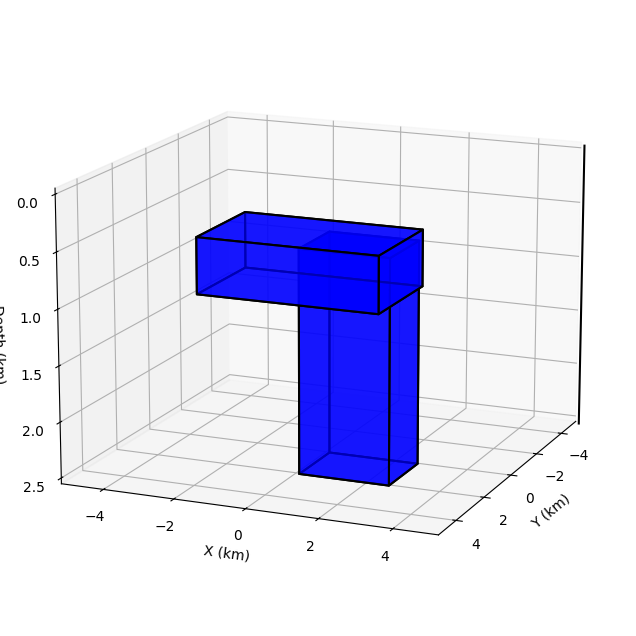

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def plot_prism(ax, origin, width, length, height, color='cyan', alpha=1, edge_color='black'):
    # Define the vertices of the prism
    x = [origin[0], origin[0] + width, origin[0] + width, origin[0], origin[0], origin[0] + width, origin[0] + width, origin[0]]
    y = [origin[1], origin[1], origin[1] + length, origin[1] + length, origin[1], origin[1], origin[1] + length, origin[1] + length]
    z = [origin[2], origin[2], origin[2], origin[2], origin[2] + height, origin[2] + height, origin[2] + height, origin[2] + height]

    # Combine the vertices into faces
    vertices = [
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[5], y[5], z[5]), (x[4], y[4], z[4])],  # Bottom face
        [(x[3], y[3], z[3]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Top face
        [(x[0], y[0], z[0]), (x[3], y[3], z[3]), (x[7], y[7], z[7]), (x[4], y[4], z[4])],  # Front face
        [(x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[5], y[5], z[5])],  # Back face
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[3], y[3], z[3])],  # Left face
        [(x[4], y[4], z[4]), (x[5], y[5], z[5]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Right face
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(vertices, facecolors=color, edgecolor=edge_color, linewidths=1.5, alpha=alpha)

    # Add the collection to the plot
    ax.add_collection3d(poly3d)

# Create a new figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot( projection='3d')

# Plot the vertical prism
plot_prism(ax, origin=[0.5, 0.3, 0.5], width=2, length=(2.5), height=2.0, color='blue', alpha=0.7)  # Vertical prism

# Plot the horizontal prism
plot_prism(ax, origin=[0.5,2.9, 0.9], width=3, length=-5, height=-0.5, color='blue', alpha=0.7)  # Horizontal prism

# Set labels and title
ax.set_xlabel('Y (km)')
ax.set_ylabel('X (km)')
ax.set_zlabel('Depth (km)')

# Set the limits of the plot
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([2.5, 0])




 #Set the view from the top corner
ax.view_init(elev=15, azim=23)  # Change these values as needed for a better view

extra_z_position = 5.2  # Position for the extra Z-axis
ax.plot([-5.5, -5.5], [extra_z_position, extra_z_position], [2.6, 0], color='black')  # Extra Z-axis line


#plt.subplots_adjust(left=4, right=9, top=0.9, bottom=0.1)  # Increase whitespace around the plot

# Create a black border around the axes
# Add the top plane at the desired height
add_top_plane(ax, xlim=(-5.5, 5.5), ylim=(-5.5, 5.5), z_height=0, color='lightgray', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


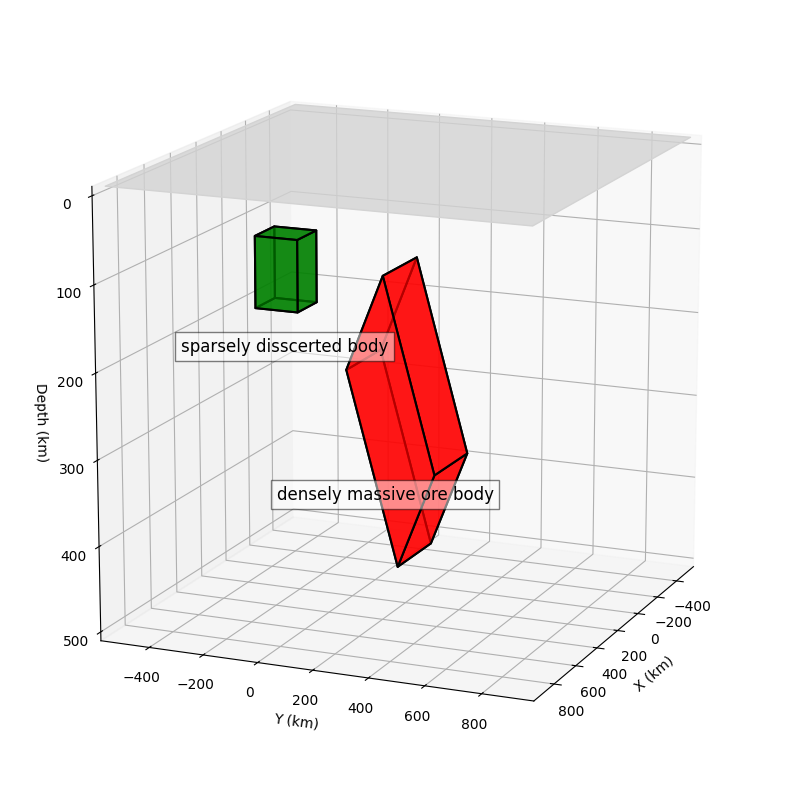

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Rotation matrix for rotating around the X-axis
def rotate_x(vertices, angle_deg):
    angle_rad = np.radians(angle_deg)
    rotation_matrix = np.array([
        [1, 0, 0],
        [0, np.cos(angle_rad), -np.sin(angle_rad)],
        [0, np.sin(angle_rad), np.cos(angle_rad)]
    ])
    return np.dot(vertices, rotation_matrix.T)

def plot_prism(ax, origin, width, length, height, color='cyan', alpha=1, edge_color='black', tilt_angle=None):
    # Define the vertices of the prism
    x = [origin[0], origin[0] + width, origin[0] + width, origin[0], origin[0], origin[0] + width, origin[0] + width, origin[0]]
    y = [origin[1], origin[1], origin[1] + length, origin[1] + length, origin[1], origin[1], origin[1] + length, origin[1] + length]
    z = [origin[2], origin[2], origin[2], origin[2], origin[2] + height, origin[2] + height, origin[2] + height, origin[2] + height]

    vertices = np.array(list(zip(x, y, z)))  # Combine x, y, z into vertices

    # Apply rotation if tilt_angle is provided
    if tilt_angle is not None:
        vertices = rotate_x(vertices, tilt_angle)

    # Extract rotated x, y, z values
    x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]

    # Combine the vertices into faces
    faces = [
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[5], y[5], z[5]), (x[4], y[4], z[4])],  # Bottom face
        [(x[3], y[3], z[3]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Top face
        [(x[0], y[0], z[0]), (x[3], y[3], z[3]), (x[7], y[7], z[7]), (x[4], y[4], z[4])],  # Front face
        [(x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[6], y[6], z[6]), (x[5], y[5], z[5])],  # Back face
        [(x[0], y[0], z[0]), (x[1], y[1], z[1]), (x[2], y[2], z[2]), (x[3], y[3], z[3])],  # Left face
        [(x[4], y[4], z[4]), (x[5], y[5], z[5]), (x[6], y[6], z[6]), (x[7], y[7], z[7])],  # Right face
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(faces, facecolors=color, edgecolor=edge_color, linewidths=1.5, alpha=alpha)

    # Add the collection to the plot
    ax.add_collection3d(poly3d)

def add_top_plane(ax, xlim, ylim, z_height, color='lightgray', alpha=0.8):
    # Define the top plane as a large rectangle at the specified z_height
    x = [xlim[0], xlim[1], xlim[1], xlim[0]]
    y = [ylim[0], ylim[0], ylim[1], ylim[1]]
    z = [z_height] * 4  # Constant z-height for the top plane
    verts = [list(zip(x, y, z))]
    ax.add_collection3d(Poly3DCollection(verts, color=color, alpha=alpha))

# Create a new figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

# Plot the vertical prism with a 150-degree tilt around the X-axis
plot_prism(ax, origin=[-200, 150, 30], width=300, length=300, height=180, color='red', alpha=0.7, tilt_angle=50)

# Plot the horizontal prism (no tilt)
plot_prism(ax, origin=[800, -10, 30], width=150, length=150, height=80, color='green', alpha=0.7)

# Set labels and title
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Depth (km)')

# Adjust axes limits dynamically to ensure both prisms are visible
ax.set_xlim([-550, 950])  # Adjust the range as necessary based on the prism positions
ax.set_ylim([-550, 950])
ax.set_zlim([500, 0])  # Inverted depth axis
ax.set_box_aspect([1, 1, 1])  # [X, Y, Z] aspect ratio set to equal

# Add the top plane to the 3D plot
add_top_plane(ax, xlim=[-550, 950], ylim=[-550, 950], z_height=-10, color='lightgray', alpha=0.8)
# Add text boxes
ax.text(100, -700, 250, "sparsely disscerted body", color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax.text(800, -10, 340, "densely massive ore body", color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set the view from the top corner
ax.view_init(elev=15, azim=23)  # Change these values as needed for a better view

# Show the plot
plt.tight_layout()
plt.show()



In [1]:
import numpy as np

def stochastic_gradient_descent_momentum(X, y, learning_rate=0.01, momentum=0.9, epochs=100):
    """
    Stochastic Gradient Descent with Momentum
    
    Parameters:
    X : numpy.ndarray : Input features
    y : numpy.ndarray : Target values
    learning_rate : float : Learning rate
    momentum : float : Momentum coefficient
    epochs : int : Number of iterations over the training data
    
    Returns:
    w : numpy.ndarray : Updated weights after training
    """
    # Initialize parameters
    num_samples, num_features = X.shape
    w = np.zeros(num_features)
    m = np.zeros(num_features)  # Initialize momentum

    # Training loop
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(num_samples):
            # Compute the gradient
            gradient = compute_gradient(X_shuffled[i], y_shuffled[i], w)

            # Update momentum
            m = momentum * m + (1 - momentum) * gradient

            # Update weights
            w = w - learning_rate * m
            
    return w

def compute_gradient(x, y, w):
    """
    Computes the gradient of the loss function.
    
    Parameters:
    x : numpy.ndarray : Input feature vector
    y : float : Target value
    w : numpy.ndarray : Current weights
    
    Returns:
    gradient : numpy.ndarray : Computed gradient
    """
    # Example gradient for Mean Squared Error
    prediction = np.dot(x, w)
    error = prediction - y
    gradient = 2 * error * x  # Gradient of MSE
    return gradient

# Example usage
if __name__ == "__main__":
    # Generate some sample data
    np.random.seed(0)
    X = np.random.rand(100, 3)  # 100 samples, 3 features
    y = np.random.rand(100)      # 100 target values

    # Train the model using SGD with momentum
    weights = stochastic_gradient_descent_momentum(X, y)
    print("Updated Weights:", weights)


Updated Weights: [0.1675242  0.40638315 0.24675608]


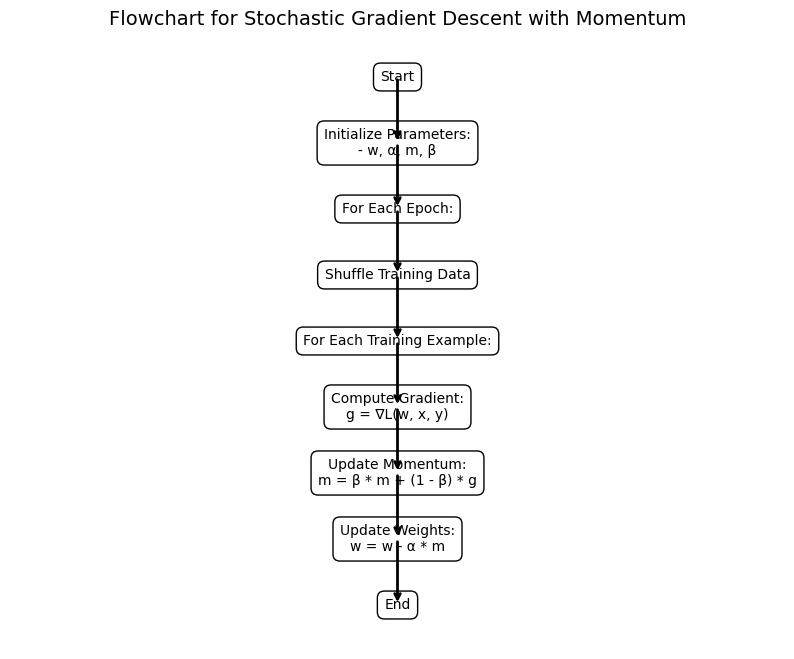

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Define box styles
box_style = {"boxstyle": "round,pad=0.5", "facecolor": "white", "edgecolor": "black"}
arrow_style = {"arrowstyle": "->", "lw": 0.1}

# Define text positions
positions = {
    "start": (0.5, 0.9),
    "init": (0.5, 0.75),
    "epoch": (0.5, 0.6),
    "shuffle": (0.5, 0.45),
    "for_each": (0.5, 0.3),
    "compute_grad": (0.5, 0.15),
    "update_momentum": (0.5, 0),
    "update_weights": (0.5, -0.15),
    "end": (0.5, -0.3)
}

# Add boxes
ax.text(*positions["start"], "Start", ha='center', va='center', bbox=box_style)
ax.text(*positions["init"], "Initialize Parameters:\n- w, α, m, β", ha='center', va='center', bbox=box_style)
ax.text(*positions["epoch"], "For Each Epoch:", ha='center', va='center', bbox=box_style)
ax.text(*positions["shuffle"], "Shuffle Training Data", ha='center', va='center', bbox=box_style)
ax.text(*positions["for_each"], "For Each Training Example:", ha='center', va='center', bbox=box_style)
ax.text(*positions["compute_grad"], "Compute Gradient:\ng = ∇L(w, x, y)", ha='center', va='center', bbox=box_style)
ax.text(*positions["update_momentum"], "Update Momentum:\nm = β * m + (1 - β) * g", ha='center', va='center', bbox=box_style)
ax.text(*positions["update_weights"], "Update Weights:\nw = w - α * m", ha='center', va='center', bbox=box_style)
ax.text(*positions["end"], "End", ha='center', va='center', bbox=box_style)

# Draw arrows
arrow_properties = dict(arrowstyle='->', linewidth=2, color='black')
ax.annotate('', xy=positions["init"], xytext=positions["start"],
            arrowprops=arrow_properties)
ax.annotate('', xy=positions["epoch"], xytext=positions["init"],
            arrowprops=arrow_properties)
ax.annotate('', xy=positions["shuffle"], xytext=positions["epoch"],
            arrowprops=arrow_properties)
ax.annotate('', xy=positions["for_each"], xytext=positions["shuffle"],
            arrowprops=arrow_properties)
ax.annotate('', xy=positions["compute_grad"], xytext=positions["for_each"],
            arrowprops=arrow_properties)
ax.annotate('', xy=positions["update_momentum"], xytext=positions["compute_grad"],
            arrowprops=arrow_properties)
ax.annotate('', xy=positions["update_weights"], xytext=positions["update_momentum"],
            arrowprops=arrow_properties)
ax.annotate('', xy=positions["end"], xytext=positions["update_weights"],
            arrowprops=arrow_properties)

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(-0.4, 1)
ax.axis('off')

# Show the plot
plt.title("Flowchart for Stochastic Gradient Descent with Momentum", fontsize=14)
plt.show()


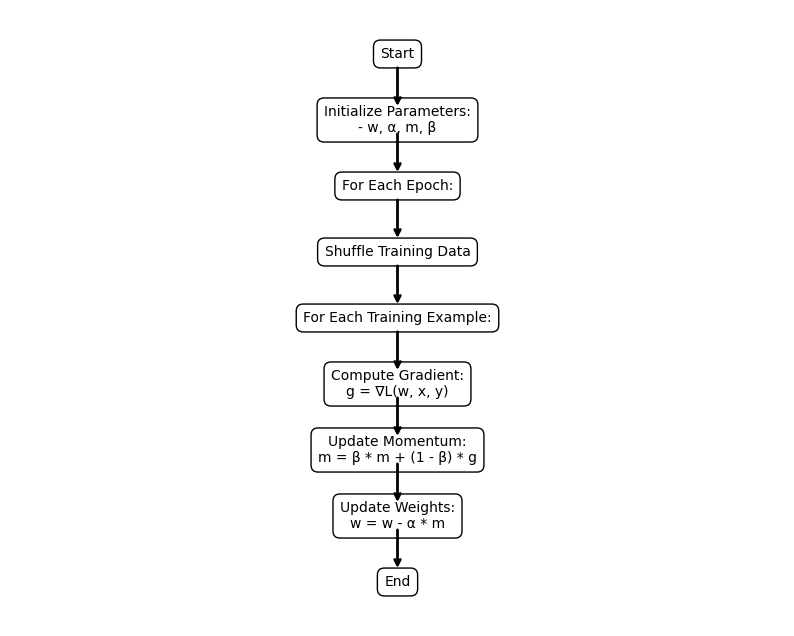

In [12]:
# Create a figure and a set of subplots with smaller arrow lengths
fig, ax = plt.subplots(figsize=(10, 8))

# Add boxes again with the same styles
ax.text(*positions["start"], "Start", ha='center', va='center', bbox=box_style)
ax.text(*positions["init"], "Initialize Parameters:\n- w, α, m, β", ha='center', va='center', bbox=box_style)
ax.text(*positions["epoch"], "For Each Epoch:", ha='center', va='center', bbox=box_style)
ax.text(*positions["shuffle"], "Shuffle Training Data", ha='center', va='center', bbox=box_style)
ax.text(*positions["for_each"], "For Each Training Example:", ha='center', va='center', bbox=box_style)
ax.text(*positions["compute_grad"], "Compute Gradient:\ng = ∇L(w, x, y)", ha='center', va='center', bbox=box_style)
ax.text(*positions["update_momentum"], "Update Momentum:\nm = β * m + (1 - β) * g", ha='center', va='center', bbox=box_style)
ax.text(*positions["update_weights"], "Update Weights:\nw = w - α * m", ha='center', va='center', bbox=box_style)
ax.text(*positions["end"], "End", ha='center', va='center', bbox=box_style)

# Draw shorter arrows
short_arrow_properties = dict(arrowstyle='->', linewidth=2, color='black', shrinkA=10, shrinkB=10)
ax.annotate('', xy=positions["init"], xytext=positions["start"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=positions["epoch"], xytext=positions["init"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=positions["shuffle"], xytext=positions["epoch"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=positions["for_each"], xytext=positions["shuffle"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=positions["compute_grad"], xytext=positions["for_each"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=positions["update_momentum"], xytext=positions["compute_grad"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=positions["update_weights"], xytext=positions["update_momentum"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=positions["end"], xytext=positions["update_weights"],
            arrowprops=short_arrow_properties)

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(-0.4, 1)
ax.axis('off')

# Show the plot with smaller arrows
plt.title("", fontsize=14)
plt.show()


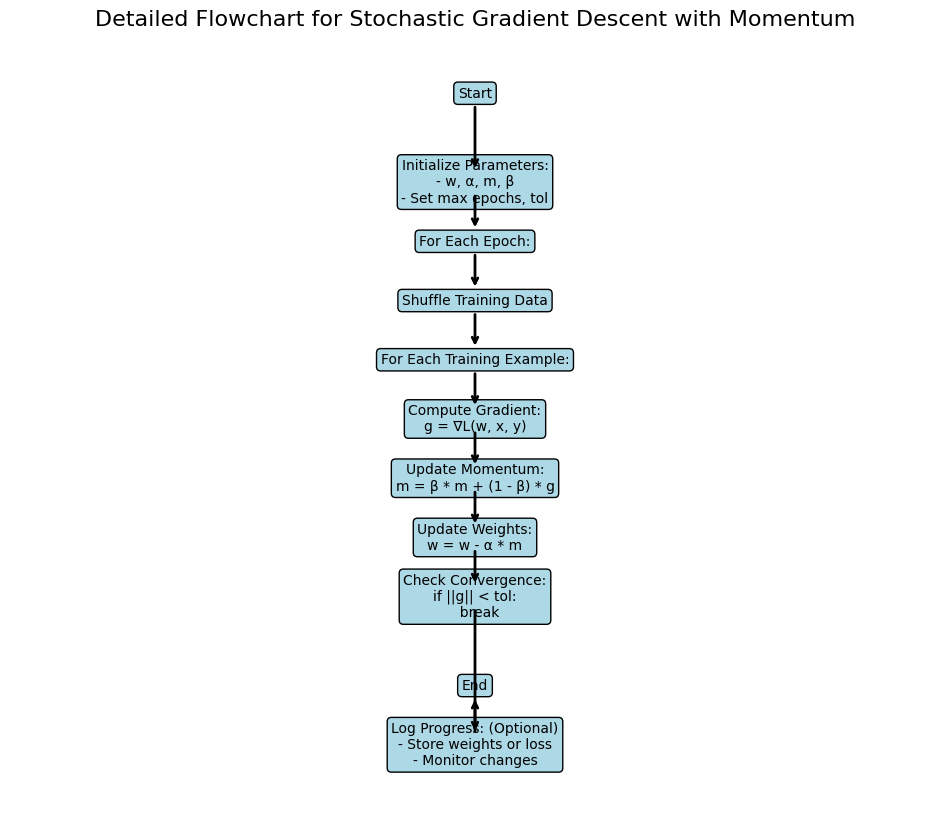

In [9]:
# Create a more detailed and complex flowchart
fig, ax = plt.subplots(figsize=(12, 10))

# Define box styles
box_style = {"boxstyle": "round,pad=0.3", "facecolor": "lightblue", "edgecolor": "black"}
arrow_style = {"arrowstyle": "->", "lw": 1.5}

# Define text positions for the detailed flowchart
detailed_positions = {
    "start": (0.5, 0.9),
    "init": (0.5, 0.75),
    "epoch": (0.5, 0.65),
    "shuffle": (0.5, 0.55),
    "for_each": (0.5, 0.45),
    "compute_grad": (0.5, 0.35),
    "update_momentum": (0.5, 0.25),
    "update_weights": (0.5, 0.15),
    "check_convergence": (0.5, 0.05),
    "end": (0.5, -0.1),
    "log_progress": (0.5, -0.2)
}

# Add boxes with more detail
ax.text(*detailed_positions["start"], "Start", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["init"], "Initialize Parameters:\n- w, α, m, β\n- Set max epochs, tol", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["epoch"], "For Each Epoch:", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["shuffle"], "Shuffle Training Data", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["for_each"], "For Each Training Example:", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["compute_grad"], "Compute Gradient:\ng = ∇L(w, x, y)", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["update_momentum"], "Update Momentum:\nm = β * m + (1 - β) * g", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["update_weights"], "Update Weights:\nw = w - α * m", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["check_convergence"], "Check Convergence:\nif ||g|| < tol:\n  break", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["log_progress"], "Log Progress: (Optional)\n- Store weights or loss\n- Monitor changes", ha='center', va='center', bbox=box_style)
ax.text(*detailed_positions["end"], "End", ha='center', va='center', bbox=box_style)

# Draw arrows
short_arrow_properties = dict(arrowstyle='->', linewidth=2, color='black', shrinkA=10, shrinkB=10)
ax.annotate('', xy=detailed_positions["init"], xytext=detailed_positions["start"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=detailed_positions["epoch"], xytext=detailed_positions["init"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=detailed_positions["shuffle"], xytext=detailed_positions["epoch"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=detailed_positions["for_each"], xytext=detailed_positions["shuffle"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=detailed_positions["compute_grad"], xytext=detailed_positions["for_each"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=detailed_positions["update_momentum"], xytext=detailed_positions["compute_grad"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=detailed_positions["update_weights"], xytext=detailed_positions["update_momentum"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=detailed_positions["check_convergence"], xytext=detailed_positions["update_weights"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=detailed_positions["log_progress"], xytext=detailed_positions["check_convergence"],
            arrowprops=short_arrow_properties)
ax.annotate('', xy=detailed_positions["end"], xytext=detailed_positions["log_progress"],
            arrowprops=short_arrow_properties)

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 1)
ax.axis('off')

# Show the plot with more detail and complexity
plt.title("Detailed Flowchart for Stochastic Gradient Descent with Momentum", fontsize=16)
plt.show()
